visualises benchmark results for report/presentation
graphs we should:
- bte/qte/mm with mm better (time performance, more embeddable) - noisy bipartite
- bte/qte/mm with template more embeddable than mm
- template high vs low number of faulty bits
- coa/pssa/mm with coa more embeddable, but slower - non faulty

In [5]:
import pickle5 as pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [6]:
def load_all_benchmarks(directories):
    benchmarks = {directory: [] for directory in directories}
    for directory in directories:
        for file in os.listdir(directory):
            if file.endswith(".pickle"):
                benchmarks[directory].append(file)
    return benchmarks

def return_times(filename, typename, guest_type, edge_density):
    with open(filename, 'rb') as file:
        result = pickle.load(file)
    times = []
    for n, dict in result[guest_type][edge_density].items():
        if 'walltime' in dict:
            times.append([int(n), dict['walltime']])

    if times:
        print(times)
        df = pd.DataFrame(np.array(times), columns=['n', 'times'])
        df['type'] = typename
        return df
    else:
        return pd.DataFrame()

def return_time_performance(guest_type, edge_density, fault_condition, algorithms, benchmark_results):

    times = []
    for alg in algorithms:
        for path in benchmark_directories:
            for file in benchmark_results[path]:
                    if alg in file and fault_condition in file:
                        time = return_times(os.path.join(path, file), alg, guest_type, edge_density)
                        times.append(time)
    df = pd.concat(times)
    df = df.rename(columns={"n": "number of guest graph nodes", "times": "time to embed"})
    return df

def plot_performance(df, title):
    plt.figure()
    sns.set_style("darkgrid")
    plt.title(title)
    sns.lineplot(data=df, x="number of guest graph nodes", y="time to embed", hue='type')
    plt.savefig("plots/" + title + ".png", dpi=300)
    plt.show()

[[65, 6.8517401090000005], [66, 6.230779321], [67, 6.69523795], [68, 7.060688456], [69, 7.4457346090000005], [70, 7.008015127], [71, 6.96424744], [72, 7.016922591], [73, 7.1485421360000005], [74, 7.023385652000001], [75, 62.500717076]]
[[10, 0.600740299], [11, 1.3518486490000001], [12, 1.12077387], [13, 1.072877295], [14, 1.512405175], [15, 1.7074682870000002], [16, 1.944860755], [17, 1.9828519260000002], [18, 2.099285999], [19, 2.1251864240000002], [20, 2.179648599], [21, 2.3627471250000003], [22, 2.527056848], [23, 2.574343974], [24, 2.4771234580000003], [25, 2.618519407], [26, 2.751597528], [27, 3.155172625], [28, 3.1329777840000004], [29, 3.0125541300000003], [30, 3.3089847810000004], [31, 3.445716083], [32, 3.4988350140000004], [33, 3.5487235860000004], [34, 3.7722104040000004], [35, 3.703230265], [36, 3.731991008], [37, 3.763734758], [38, 3.917755579], [39, 4.158907365], [40, 4.313054759], [41, 4.266174846], [42, 4.185929025], [43, 3.9388182260000004], [44, 3.9755796940000003], [

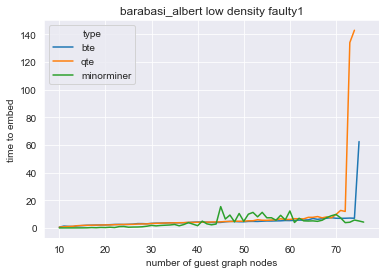

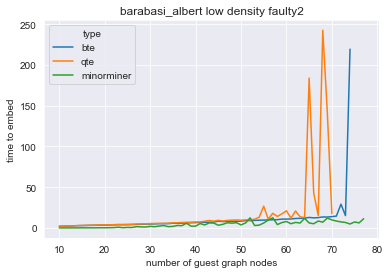

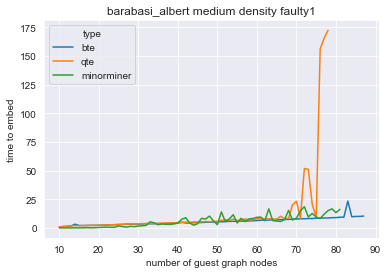

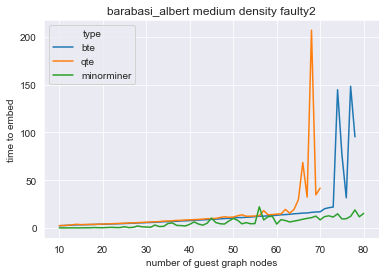

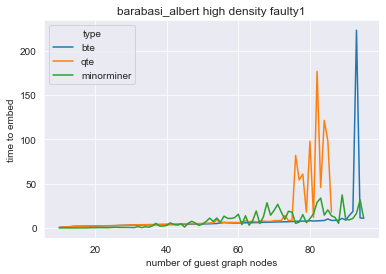

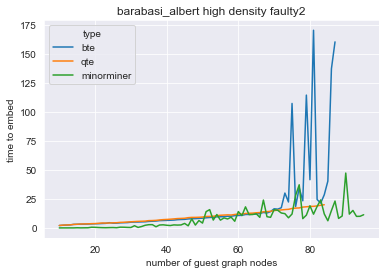

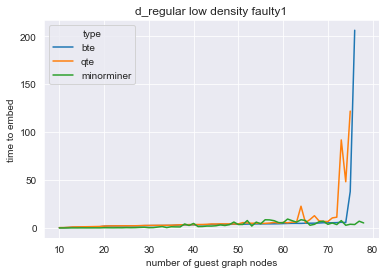

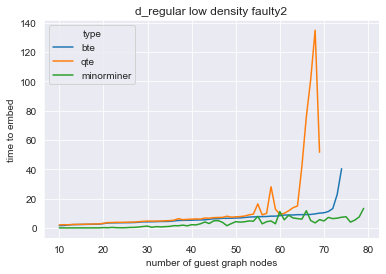

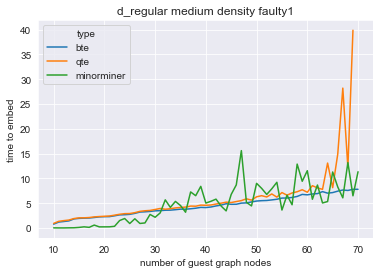

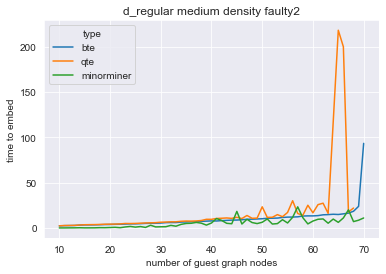

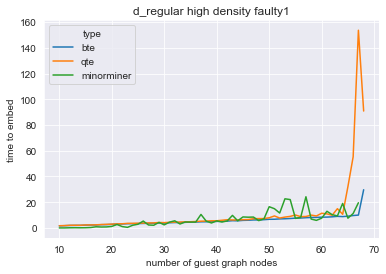

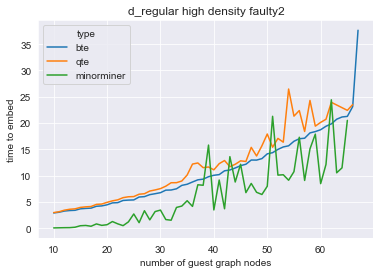

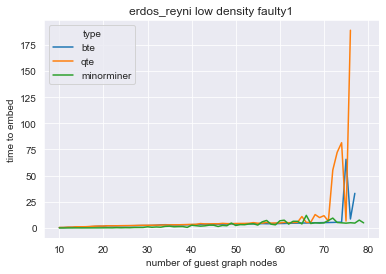

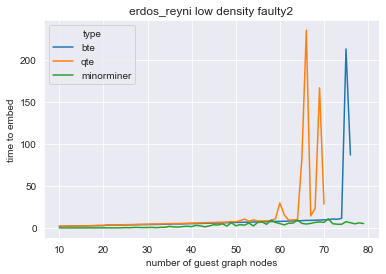

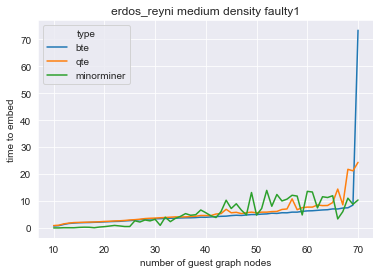

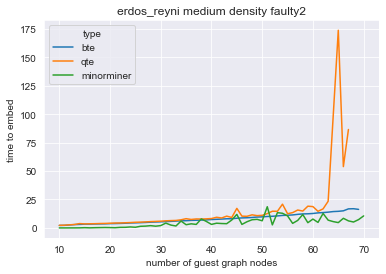

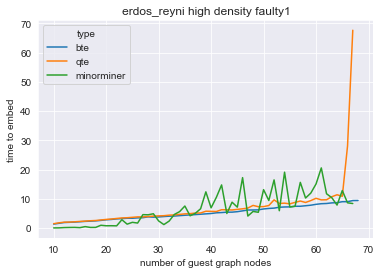

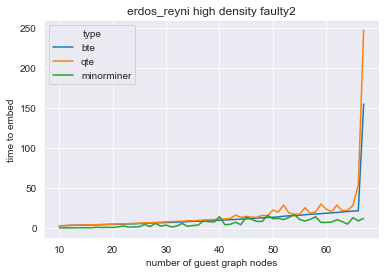

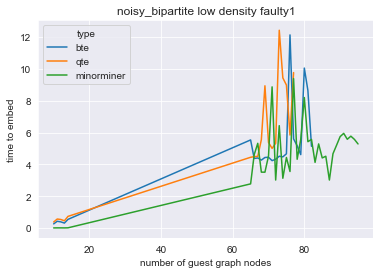

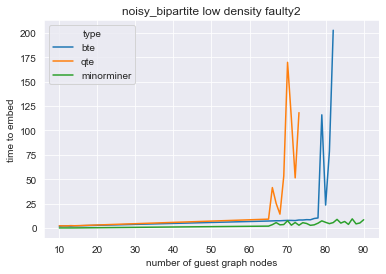

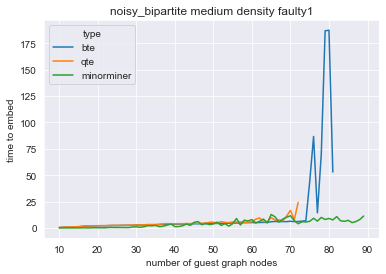

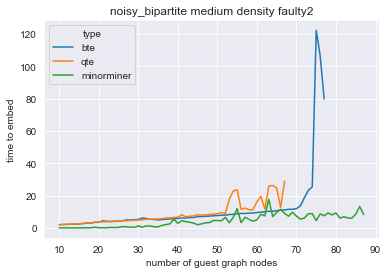

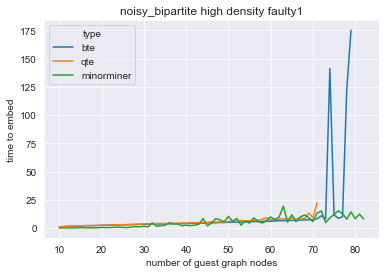

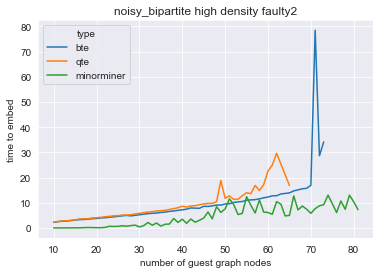

In [7]:
fault_conditions = ['faulty1', 'faulty2']
benchmark_directories = ['results', 'small_results']
guest_types = ["barabasi_albert", "d_regular", "erdos_reyni", "noisy_bipartite"]
edge_densities = ["low", "medium", "high"]
algorithms = ['bte', 'qte', 'minorminer']

benchmark_results = load_all_benchmarks(benchmark_directories)

dfs = []

for guest in guest_types:
    for density in edge_densities:
        for fault in fault_conditions:
            dfs.append((guest + ' ' + density + ' density '+ fault, return_time_performance(guest, density, fault, algorithms, benchmark_results)))

for df in dfs:
    plot_performance(df[1], df[0])

[[65, 28.10988473892212], [66, 116.7741630077362]]
[[65, 2.6217591762542725], [66, 2.4422991275787354], [67, 2.487048864364624], [68, 2.57590913772583], [69, 2.6179609298706055], [70, 3.1487221717834473], [71, 2.952903985977173], [72, 2.7841010093688965], [73, 3.3069450855255127], [74, 3.9719748497009277], [75, 9.170766115188599], [76, 25.68641710281372], [77, 29.624860286712646], [78, 8.059445858001709], [79, 41.129602909088135], [80, 69.3461902141571], [81, 90.90229988098145], [82, 93.33333206176758], [83, 116.11781311035156], [84, 155.11951112747192], [85, 250.08335494995117]]
[[65, 3.5446488857269287], [66, 16.607292890548706], [67, 9.568450212478638], [68, 9.647557258605957], [69, 8.504934072494507], [70, 6.960689306259155], [71, 3.8996388912200928], [72, 6.392133951187134], [73, 7.874075174331665], [74, 8.220431089401245], [75, 8.0569589138031], [76, 8.220649242401123], [77, 6.203803062438965], [78, 12.953706979751587]]
[[65, 85.43173909187317]]
[[65, 2.3303141593933105], [66, 2.

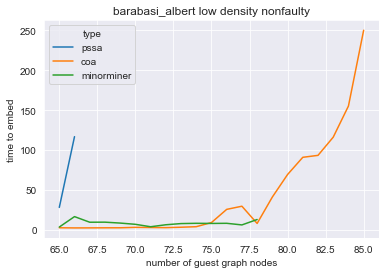

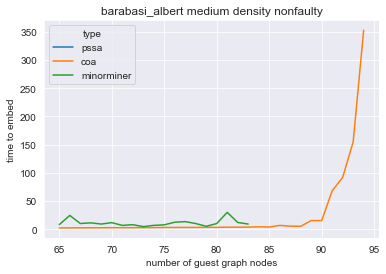

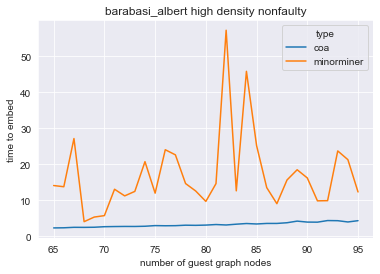

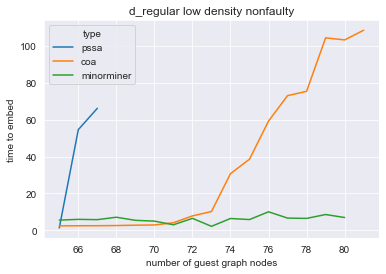

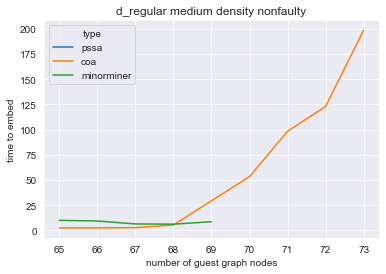

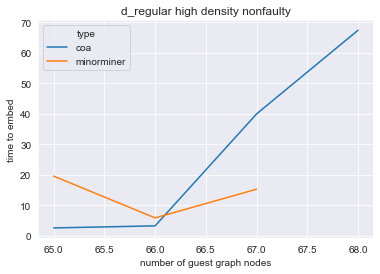

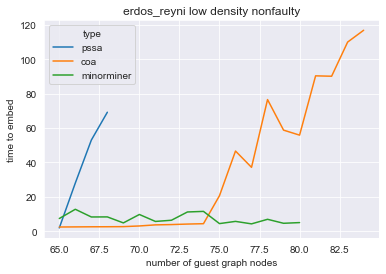

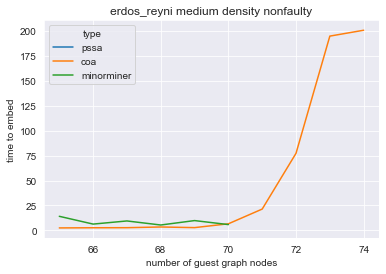

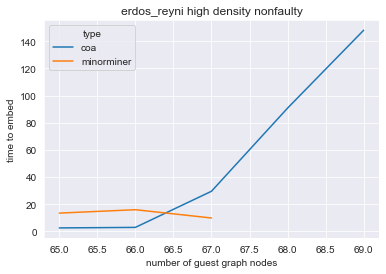

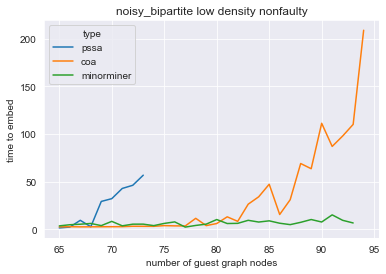

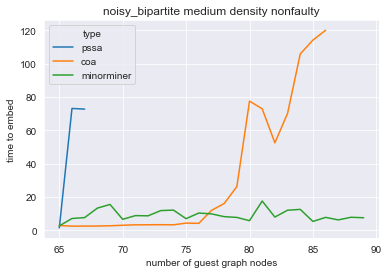

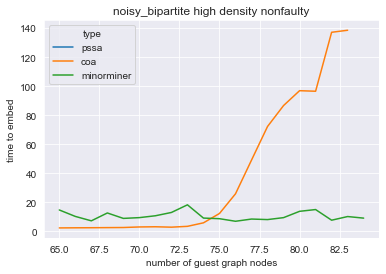

In [8]:
fault_conditions = ['nonfaulty']
benchmark_directories = ['results']
guest_types = ["barabasi_albert", "d_regular", "erdos_reyni", "noisy_bipartite"]
edge_densities = ["low", "medium", "high"]
algorithms = ['pssa', 'coa', 'minorminer']

benchmark_results = load_all_benchmarks(benchmark_directories)

dfs = []

for guest in guest_types:
    for density in edge_densities:
        for fault in fault_conditions:
            df = return_time_performance(guest, density, fault, algorithms, benchmark_results)
            if not df.empty:
                dfs.append((guest + ' ' + density + ' density '+ fault, df))

for df in dfs:
    plot_performance(df[1], df[0])